<a href="https://colab.research.google.com/github/gaurav700/Machine-Learning-algorithms/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('Salary_dataset.csv')
df = df.iloc[:, 1:]
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


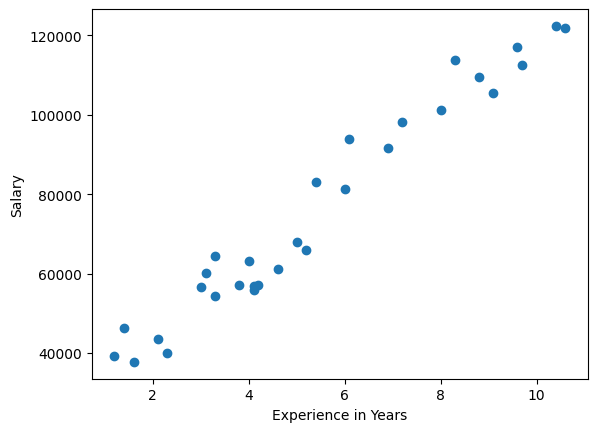

In [ ]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.ylabel('Salary')
plt.xlabel('Experience in Years')
plt.show()

In [ ]:
X = df.iloc[:, 0:1]
y = df.iloc[: , -1]



In [ ]:
X

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3
5,3.0
6,3.1
7,3.3
8,3.3
9,3.8


In [ ]:
y

,Salary
0,39344.0
1,46206.0
2,37732.0
3,43526.0
4,39892.0
5,56643.0
6,60151.0
7,54446.0
8,64446.0
9,57190.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_train

,YearsExperience
28,10.4
24,8.8
12,4.1
0,1.2
4,2.3
16,5.2
5,3.0
13,4.2
11,4.1
22,8.0


In [ ]:
y_train

,Salary
28,122392.0
24,109432.0
12,56958.0
0,39344.0
4,39892.0
16,66030.0
5,56643.0
13,57082.0
11,55795.0
22,101303.0


In [ ]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([115791.21011287])

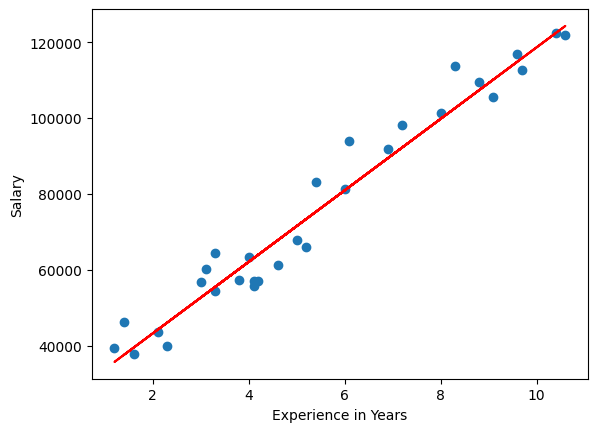

In [ ]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.plot(X_train, lr.predict(X_train), color='red')
plt.ylabel('Salary')
plt.xlabel('Experience in Years')
plt.show()

In [ ]:
m = lr.coef_
b = lr.intercept_

print(f'slope is {m} and intercept is {b}')

slope is [9423.81532303] and intercept is 24380.201479473704


## Regression Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_test

array([112636.,  67939., 113813.,  83089.,  64446.,  57190.])

In [ ]:
print("Mean absolute error : ", mean_absolute_error(y_test, y_pred))
print("Mean squared error : ", mean_squared_error(y_test, y_pred))
print("Root Mean squared error : ", root_mean_squared_error(y_test, y_pred))
print("R2 score : ", r2_score(y_test, y_pred))

Mean absolute error :  6286.453830757745
Mean squared error :  49830096.855908394
Root Mean squared error :  7059.04362190151
R2 score :  0.9024461774180497


## Inventing SLR

In [ ]:
class SLR:
  def __init__(self) -> None:
    self.m = None
    self.b = None

  def fit(self, X_train, y_train):
    num = 0
    den = 0

    # Iterate over the values of the Series
    for x, y in zip(X_train, y_train):
      num = num+((x - X_train.mean()) * (y - y_train.mean()))
      den = den+((x - X_train.mean()) * (x - X_train.mean()))

    self.m = num/den
    self.b = y_train.mean() - (self.m * X_train.mean())
    print(self.m)
    print(self.b)

  def predict(self, X_test):
    return self.m * X_test + self.b

In [ ]:
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values

from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr = SLR();
lr.fit(X_train, y_train)



9423.815323030976
24380.201479473704


In [ ]:
lr.predict(X_test[0])

np.float64(115791.21011287416)

# Multiple Linear Regression

In [ ]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes':1, 'No': 0})
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,NaN,9,1,91.0
1,4,82,NaN,4,2,65.0
2,8,51,NaN,7,2,45.0
3,5,52,NaN,5,2,36.0
4,7,75,NaN,8,5,66.0


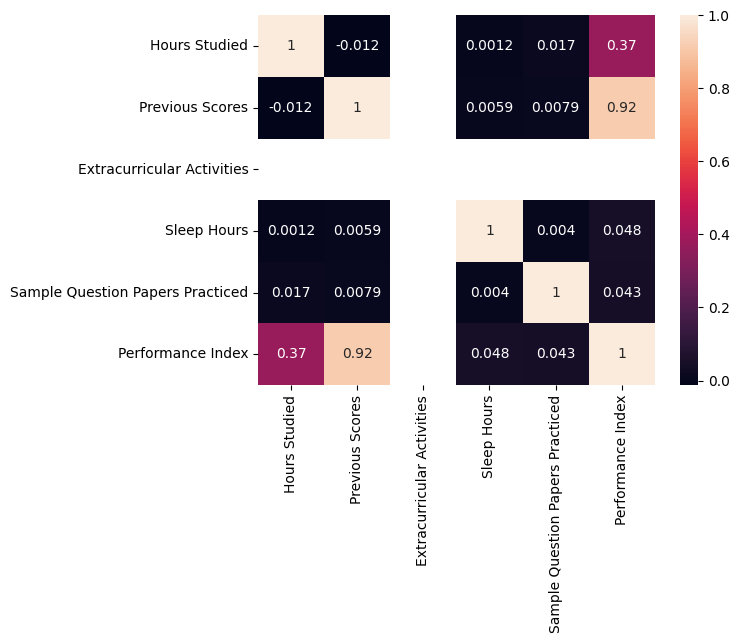

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# --- Assume df has columns: ['Previous Scores', 'Hours Studied', 'Performance Index'] ---
X = df[['Previous Scores', 'Hours Studied']]
y = df['Performance Index']

# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# --- Scale the features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Convert scaled data back to DataFrame for easier plotting ---
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# --- Train linear regression on scaled data ---
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# --- Predictions ---
y_pred = lr.predict(X_test_scaled)

# --- Evaluation ---
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)
print("Root Mean squared error:", np.sqrt(mse))
print("R2 score:", r2_score(y_test, y_pred))

# --- Create interactive 3D scatter plot (scaled) ---
fig = go.Figure(data=[go.Scatter3d(
    x=X_train_scaled_df['Previous Scores'],
    y=X_train_scaled_df['Hours Studied'],
    z=y_train,
    mode='markers',
    marker=dict(
        size=6,
        color=y_train,
        colorscale='Plasma',
        opacity=0.8
    ),
    name='Training Data'
)])

# --- Create a mesh grid for regression plane ---
x_surf, y_surf = np.meshgrid(
    np.linspace(X_train_scaled_df['Previous Scores'].min(), X_train_scaled_df['Previous Scores'].max(), 30),
    np.linspace(X_train_scaled_df['Hours Studied'].min(), X_train_scaled_df['Hours Studied'].max(), 30)
)

# Predict performance index for grid points
z_surf = lr.predict(np.column_stack((x_surf.ravel(), y_surf.ravel()))).reshape(x_surf.shape)

# --- Add regression plane ---
fig.add_trace(go.Surface(
    x=x_surf,
    y=y_surf,
    z=z_surf,
    colorscale='Viridis',
    opacity=0.6,
    name='Regression Plane'
))

# --- Customize layout ---
fig.update_layout(
    scene=dict(
        xaxis_title='Previous Scores (scaled)',
        yaxis_title='Hours Studied (scaled)',
        zaxis_title='Performance Index',
        aspectmode='cube'
    ),
    title='3D Regression Plane on Scaled Data',
    width=900,
    height=700
)

# --- Show 3D interactive plot ---
fig.show()

Mean absolute error: 1.8269025376295684
Mean squared error: 5.241921186551515
Root Mean squared error: 2.289524227116087
R2 score: 0.985855014245765


# Polynomial Linear Regression

In [ ]:
df = pd.read_csv('Ice_cream selling data.csv')
df

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


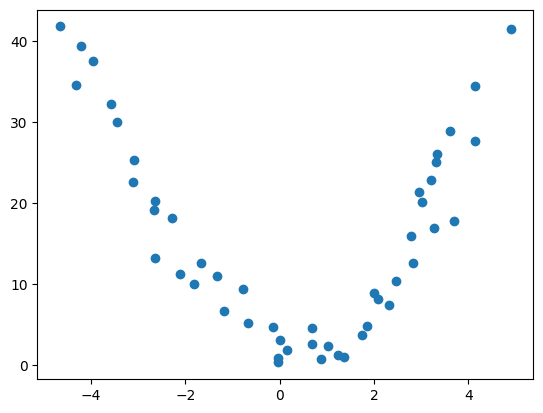

In [ ]:
plt.scatter(df['Temperature (°C)'], df['Ice Cream Sales (units)'])
plt.show()

In [ ]:
X = df.iloc[:, 0:1]
y = df.iloc[:, -1]

In [ ]:
y.shape

(49,)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)

X_poly = poly.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression();
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_test

array([10.01286785, 17.84395652, 27.69838335, 28.91218793,  9.39296866,
        2.31380636,  0.78997365,  4.62568946,  4.8579878 ,  4.67364254])

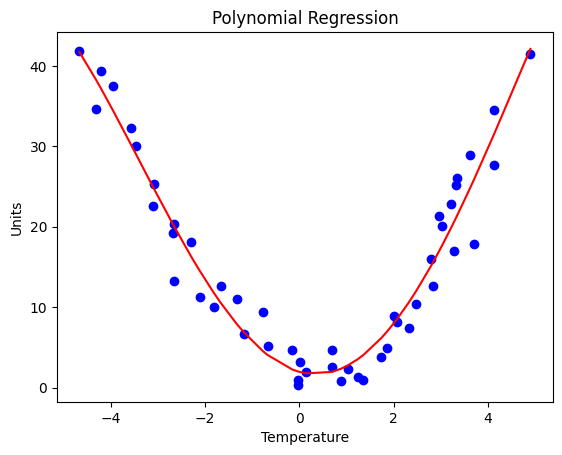

In [ ]:
plt.scatter(X, y, color='blue')

plt.plot(X, lin2.predict(poly.fit_transform(X)),
         color='red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Units')

plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)
print("Root Mean squared error:", np.sqrt(mse))
print("R2 score:", r2_score(y_test, y_pred))

Mean absolute error: 3.43761854085144
Mean squared error: 18.444159664446097
Root Mean squared error: 4.29466642062525
R2 score: 0.8054468908427623
